In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
12713,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
x = df.iloc[:, 1:785].values
y = df.iloc[:, 0].values


In [6]:
img = x[1]
img = img.reshape(28,28)

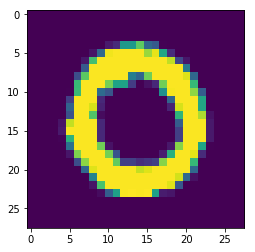

Corresponding label:  0


In [7]:
plt.imshow(img)
plt.show()
print('Corresponding label: ', y[1])

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

Using TensorFlow backend.


In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y_train = enc.fit_transform(y_train.reshape(-1,1)).toarray()
#enc2 = OneHotEncoder()
y_test = enc.transform(y_test.reshape(-1,1)).toarray()

In [12]:
model = Sequential()
model.add(Dense(784, input_dim=784, kernel_initializer='uniform', activation='relu'))


In [13]:

model.add(Dense(10, kernel_initializer='uniform', activation='softmax'))

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model.fit(x_train, y_train, validation_data=(x_train, y_train), epochs=10, batch_size=200, verbose=2)

Train on 33600 samples, validate on 33600 samples
Epoch 1/10
 - 5s - loss: 0.3996 - acc: 0.8912 - val_loss: 0.1919 - val_acc: 0.9457
Epoch 2/10
 - 4s - loss: 0.1668 - acc: 0.9514 - val_loss: 0.1160 - val_acc: 0.9681
Epoch 3/10
 - 4s - loss: 0.1103 - acc: 0.9684 - val_loss: 0.0814 - val_acc: 0.9778
Epoch 4/10
 - 4s - loss: 0.0792 - acc: 0.9768 - val_loss: 0.0625 - val_acc: 0.9825
Epoch 5/10
 - 4s - loss: 0.0590 - acc: 0.9838 - val_loss: 0.0406 - val_acc: 0.9906
Epoch 6/10
 - 4s - loss: 0.0441 - acc: 0.9876 - val_loss: 0.0333 - val_acc: 0.9921
Epoch 7/10
 - 4s - loss: 0.0340 - acc: 0.9907 - val_loss: 0.0260 - val_acc: 0.9943
Epoch 8/10
 - 4s - loss: 0.0264 - acc: 0.9932 - val_loss: 0.0196 - val_acc: 0.9962
Epoch 9/10
 - 4s - loss: 0.0188 - acc: 0.9961 - val_loss: 0.0139 - val_acc: 0.9985
Epoch 10/10
 - 4s - loss: 0.0145 - acc: 0.9972 - val_loss: 0.0124 - val_acc: 0.9980


In [35]:
y_pred = model.predict(x_test)

In [39]:
import numpy as np


In [40]:
b = np.zeros_like(y_pred)
b[np.arange(len(y_pred)), y_pred.argmax(1)] = 1

In [42]:
b[30]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [30]:
y_test[30]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

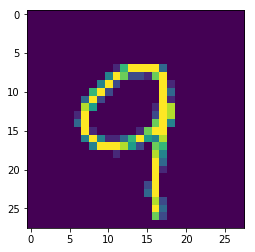

Corresponding label:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [31]:
img = x_test[30]
img = img.reshape(28,28)
plt.imshow(img)
plt.show()
print('Corresponding label: ', y_test[30])

In [43]:
test = pd.read_csv('test.csv')


In [44]:
test.sample()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
27779,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
x_test = test.iloc[:, 0:784]

In [84]:
y_pred=model.predict(x_test)

In [85]:
len(y_pred)

28000

In [89]:
reverse = [0,1,2,3,4,5,6,7,8,9]
(y_pred == y_pred.max(axis=1)[:,None]).astype(int)

array([[0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0]])

In [90]:
len(y_pred)###########################################

28000

In [92]:
ind = np.where(y_pred==1)
ind = ind[1]

In [93]:
len(ind)

27970

In [83]:
x_test.shape

(28000, 784)